In [1]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from ..utils import imshow, imshow2

## Object Points Construction

In [3]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((36, 3), np.float32)
objp[0]  = (0, 0, 0)
objp[1]  = (0, 2, 0)
objp[2]  = (0, 4, 0)
objp[3]  = (0, 6, 0)
objp[4]  = (1, 1, 0)
objp[5]  = (1, 3, 0)
objp[6]  = (1, 5, 0)
objp[7]  = (1, 7, 0)
objp[8]  = (2, 0, 0)
objp[9]  = (2, 2, 0)
objp[10] = (2, 4, 0)
objp[11] = (2, 6, 0)
objp[12] = (3, 1, 0)
objp[13] = (3, 3, 0)
objp[14] = (3, 5, 0)
objp[15] = (3, 7, 0)
objp[16] = (4, 0, 0)
objp[17] = (4, 2, 0)
objp[18] = (4, 4, 0)
objp[19] = (4, 6, 0)
objp[20] = (5, 1, 0)
objp[21] = (5, 3, 0)
objp[22] = (5, 5, 0)
objp[23] = (5, 7, 0)
objp[24] = (6, 0, 0)
objp[25] = (6, 2, 0)
objp[26] = (6, 4, 0)
objp[27] = (6, 6, 0)
objp[28] = (7, 1, 0)
objp[29] = (7, 3, 0)
objp[30] = (7, 5, 0)
objp[31] = (7, 7, 0)
objp[32] = (8, 0, 0)
objp[33] = (8, 2, 0)
objp[34] = (8, 4, 0)
objp[35] = (8, 6, 0)

np.save('objpoints.npy',objp)

## Define Blob Filter

In [4]:
########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 8
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 64     # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 700 #1000   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.1

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.5

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

## Blob Detector for accurate point detection (left view)

In [5]:
img_left = cv2.imread('cam2_11.png')

gray = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
keypoints = blobDetector.detect(gray) # Detect blobs.

points = {}
for keypoint in keypoints:
    points[keypoint.pt[0]] = keypoint.pt[1]

coordx = [key for key in points.keys()]
coordx.sort(reverse=True)

acc_coords = []
for x in coordx:
    acc_coords.append([[x, points[x]]])

acc_coords = np.array(acc_coords)
acc_coords_left = acc_coords.astype('float32')
#np.save('blob_loc_left.npy', acc_coords_left)

In [6]:
imgs = glob.glob('./data_calib/cam2/*.png')

img_points = []
obj_points = []
for frame in imgs:
    obj_points.append(objp)
    img = cv2.imread(frame)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints = blobDetector.detect(gray) # Detect blobs.

    points = {}
    for keypoint in keypoints:
        points[keypoint.pt[0]] = keypoint.pt[1]

    coordx = [key for key in points.keys()]
    coordx.sort(reverse=True)

    acc_coords = []
    for x in coordx:
        acc_coords.append([[x, points[x]]]) 
    img_points.append(acc_coords)
    
    acc_coords = np.array(acc_coords).astype('float32')
    #
    im_with_keypoints = cv2.drawChessboardCorners(img, (4,9), acc_coords, True)
    cv2.imshow('img', im_with_keypoints)
    cv2.waitKey(5000)
    #
    
cv2.destroyAllWindows()
img_points_left = np.array(img_points).astype('float32')

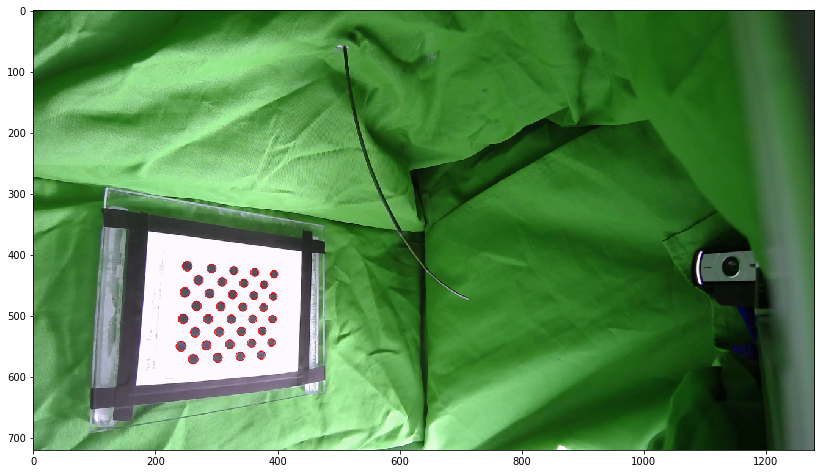

In [7]:
im_with_keypoints = cv2.drawKeypoints(img_left, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (14,18))
plt.imshow(im_with_keypoints)
plt.show()
#cv2.imwrite('blob_detect_left.png', im_with_keypoints)

## Blob Detector for accurate point detection (right view)

In [8]:
# Points in the right view
img_right = cv2.imread('cam1_14.png')

gray = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
keypoints = blobDetector.detect(gray) # Detect blobs.

points = {}
for keypoint in keypoints:
    points[keypoint.pt[0]] = keypoint.pt[1]

coordx = [key for key in points.keys()]
coordx.sort(reverse=True)

acc_coords = []
for x in coordx:
    acc_coords.append([[x, points[x]]])

acc_coords = np.array(acc_coords)
acc_coords_right = acc_coords.astype('float32')
#np.save('blob_loc_right.npy', acc_coords_right)

In [9]:
imgs = glob.glob('./data_calib/cam1/*.png')

img_points = []
obj_points = []
for frame in imgs:
    obj_points.append(objp)
    img = cv2.imread(frame)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints = blobDetector.detect(gray) # Detect blobs.

    points = {}
    for keypoint in keypoints:
        points[keypoint.pt[0]] = keypoint.pt[1]

    coordx = [key for key in points.keys()]
    coordx.sort(reverse=True)
    #coordx.sort()
    acc_coords = []
    for x in coordx:
        acc_coords.append([[x, points[x]]]) 
    img_points.append(acc_coords)
    
    acc_coords = np.array(acc_coords).astype('float32')
    
    #
    im_with_keypoints = cv2.drawChessboardCorners(img, (4,9), acc_coords, True)
    cv2.imshow('img', im_with_keypoints)
    cv2.waitKey(5000)
    #
    
cv2.destroyAllWindows()
img_points_right = np.array(img_points).astype('float32')

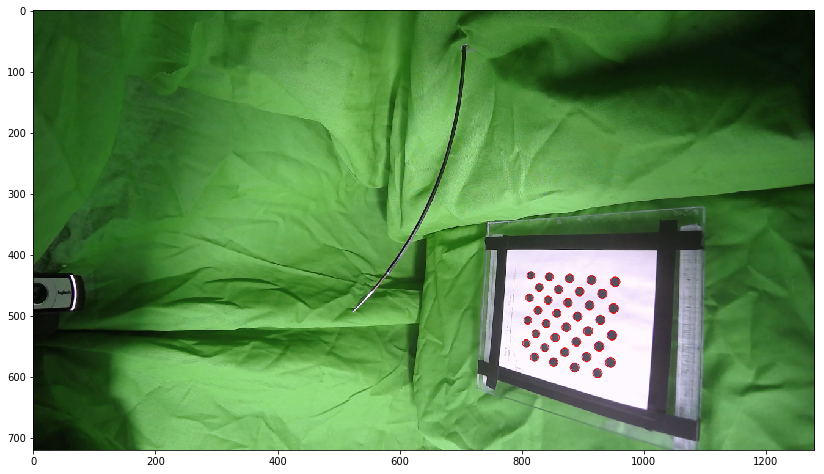

In [10]:
im_with_keypoints = cv2.drawKeypoints(img_right, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (14,18))
plt.imshow(im_with_keypoints)
plt.show()
#cv2.imwrite('blob_detect_right.png', im_with_keypoints)

## Clibration based on Blob Detection Result

### Calibration (left view)

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points_left, gray.shape[::-1], None, None)

data = {'ret': ret, 'intr_mat': mtx, 'distortion_coeff': dist, 'R': rvecs, 'T': tvecs}

#np.save('calibration_coeff_left.npy', data)

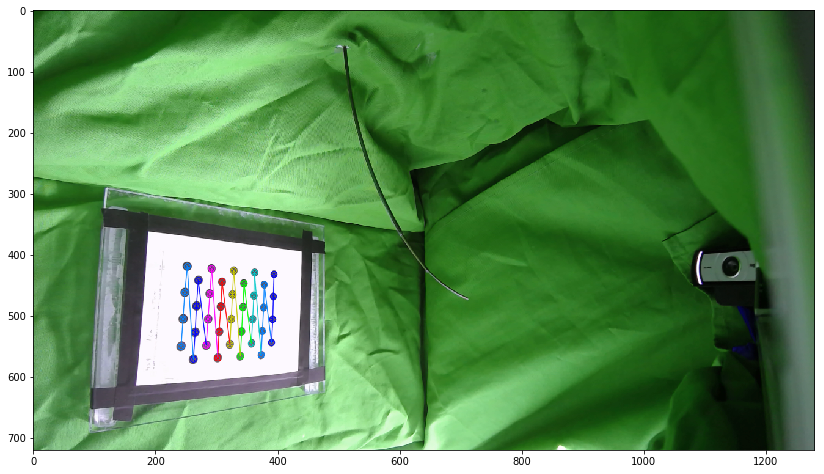

In [12]:
im_with_keypoints = cv2.drawChessboardCorners(img_left, (4,9), acc_coords_left, True)
imshow(im_with_keypoints)
#cv2.imwrite('chessboard_left.png', im_with_keypoints)

### Calibration (right view)

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points_right, gray.shape[::-1], None, None)

data = {'ret': ret, 'intr_mat': mtx, 'distortion_coeff': dist, 'R': rvecs, 'T': tvecs}

#np.save('calibration_coeff_right.npy', data)

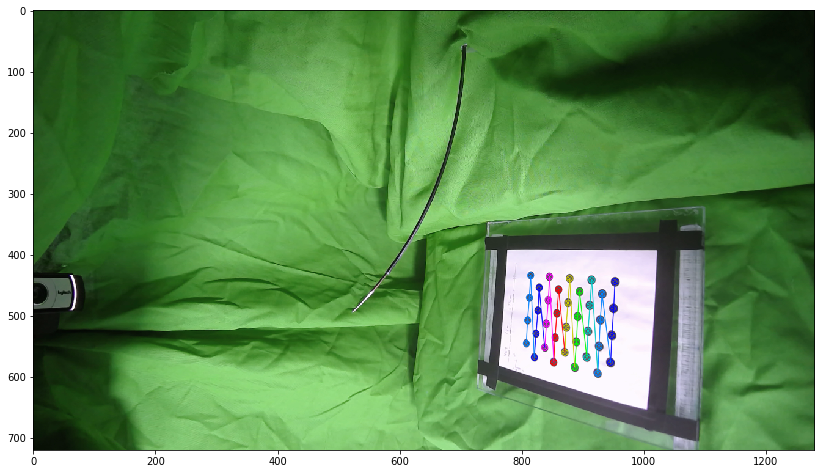

In [14]:
im_with_keypoints = cv2.drawChessboardCorners(img_right, (4,9), acc_coords_right, True)
imshow(im_with_keypoints)
#cv2.imwrite('chessboard_right.png', im_with_keypoints)

## Pipeline Testing

### Calibration

In [6]:
from calibration import CameraCalibrator

# Clibration
template_size = (6,9)
img_size = (640,360)
scale = 5
imgs_dir1 = glob.glob('./data_calib/test/cam1/*.jpg')
imgs_dir2 = glob.glob('./data_calib/test/cam2/*.jpg')
imgs_dir1.sort()
imgs_dir2.sort()

calib = CameraCalibrator(imgs_dir1, imgs_dir2, template_size, scale, img_size)
#calib.calibrate_process(stereo = True)
#param_dir = './data_calib/test/'
#calib.save_params(param_dir)
stereo_params = np.load('./data_calib/test/stereoCalibration.npy').item()
stereo_params

{'ret': 0.5935272680385361,
 'mtx1': array([[465.34920198,   0.        , 316.23802912],
        [  0.        , 465.24007844, 186.9077903 ],
        [  0.        ,   0.        ,   1.        ]]),
 'dist1': array([[ 0.11202891, -0.18986171, -0.0012957 , -0.00109452, -0.03677438]]),
 'mtx2': array([[467.36026455,   0.        , 329.81122768],
        [  0.        , 466.95927296, 176.98351798],
        [  0.        ,   0.        ,   1.        ]]),
 'dist2': array([[ 0.12156841, -0.21149109, -0.00225964,  0.00115457,  0.05606797]]),
 'R': array([[ 0.99976482, -0.00924002,  0.01961957],
        [ 0.00930207,  0.99995201, -0.00307357],
        [-0.01959023,  0.00325535,  0.99980279]]),
 'T': array([[-19.45797132],
        [ -0.16434332],
        [  0.76503337]]),
 'E': array([[-3.89687160e-03, -7.65531656e-01, -1.61959525e-01],
        [ 3.83667328e-01,  5.62735238e-02,  1.94691437e+01],
        [-1.66947679e-02, -1.94585561e+01,  6.30297304e-02]]),
 'F': array([[-3.47598787e-08, -6.83010159e-0

### Rectification

In [7]:
# Rectification
rectify_params = calib.stereo_rectify(params = stereo_params, set_alpha = 1)

M1, d1, M2, d2 = stereo_params['mtx1'], stereo_params['dist1'], stereo_params['mtx2'], stereo_params['dist2']
R1, P1, R2, P2 = rectify_params['R1'], rectify_params['P1'], rectify_params['R2'], rectify_params['P2']

In [8]:
leftMapX, leftMapY = cv2.initUndistortRectifyMap(M1, d1, R1, P1, img_size, cv2.CV_32FC1)
rightMapX, rightMapY = cv2.initUndistortRectifyMap(M2, d2, R2, P2, img_size, cv2.CV_32FC1)

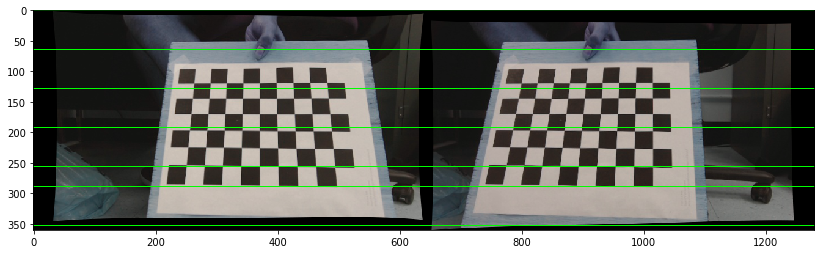

In [9]:
from utils import rectifyPlot

img_l = cv2.imread('./data_calib/test/cam1/left1.jpg')
img_r = cv2.imread('./data_calib/test/cam2/right1.jpg')

# remap
imgl_rect = cv2.remap(img_l, leftMapX, leftMapY, cv2.INTER_LINEAR)
imgr_rect = cv2.remap(img_r, rightMapX, rightMapY, cv2.INTER_LINEAR)

rect_res = rectifyPlot(imgl_rect, imgr_rect, 20)
imshow(rect_res)

### Epiline Plotting

In [15]:
from utils import epilinePlot

img_l = cv2.imread('./data_calib/test/cam1/left1.jpg')
img_r = cv2.imread('./data_calib/test/cam2/right1.jpg')

w, h = img_l.shape[:2][::-1]
newcameramtx1, _ = cv2.getOptimalNewCameraMatrix(M1, d1, (w,h), 1, (w,h))
newcameramtx2, _ = cv2.getOptimalNewCameraMatrix(M2, d2, (w,h), 1, (w,h))

imgl_undist = cv2.undistort(img_l, M1, d1, None, newcameramtx1)
imgr_undist = cv2.undistort(img_r, M2, d2, None, newcameramtx2)

In [16]:
F = stereo_params['F']

class ptCoord:
    def __init__(self):
        self.points = (0,0)

    def click_and_mark(self,event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.points = (x,y)

pt = ptCoord()

while True:
    cv2.namedWindow('imgLeft')
    cv2.namedWindow('imgRight')
    cv2.setMouseCallback('imgLeft', pt.click_and_mark)
    cv2.imshow('imgLeft',imgl_undist)
    cv2.imshow('imgRight', imgr_undist)
    #print(pt.points)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break
    elif k == ord('a'):
        imgl_undist, imgr_undist = epilinePlot(np.array([pt.points]), imgl_undist, imgr_undist, F)
cv2.destroyAllWindows()

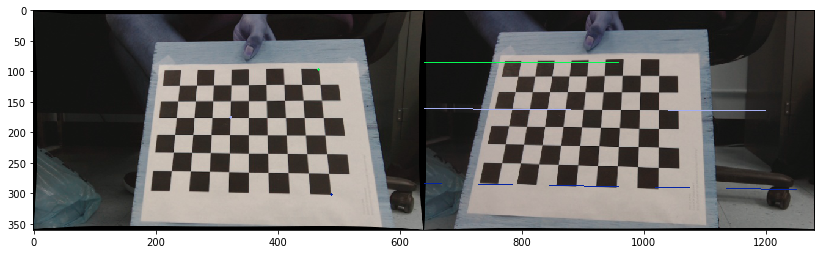

In [24]:
res = np.hstack((imgl_undist, imgr_undist))
imshow(res)

## 3D Projection

In [10]:
from utils import Projection3D 

# Projection matrices from function stereoRectify()
params1 = np.load('./data_calib/test/calibration1.npy').item()
params2 = np.load('./data_calib/test/calibration2.npy').item()

P1, P2 = rectify_params['P1'], rectify_params['P2']

pts1 = params1['imgpoints'][12]
pts2 = params2['imgpoints'][12]

imgpts1 = np.vstack((pts1.T[0][0], pts1.T[1][0]))
imgpts2 = np.vstack((pts2.T[0][0], pts2.T[1][0]))

In [11]:
# Projection matrices by calculation
R, T = stereo_params['R'], stereo_params['T']
# Find projection matrix of left camera
R_left = np.eye(3)
T_left = np.zeros((3,1))

ExtrMat_left = np.concatenate((R_left, T_left), axis = 1)
P1 = np.dot(M1, ExtrMat_left)

# Find projection matrix of right camera
# stereo_coeff = np.load('stereo_coeff.npy').item()
# R_right, T_right = stereo_coeff['rotation'], stereo_coeff['translation']
R_right, T_right = R, T
ExtrMat_right = np.concatenate((R_right, T_right), axis = 1)
P2 = np.dot(M2, ExtrMat_right)

In [15]:
res = cv2.triangulatePoints(P1, P2, imgpts1, imgpts2).T
# Convert from homogeneous to Euclidean coord
res3D = cv2.convertPointsFromHomogeneous(res).T[:,0]

# Camera Location
loc1 = np.array([[0], [0], [0]])
loc2 = np.dot(R, loc1 + T)

#Projection3D(res3D)

<IPython.core.display.Javascript object>


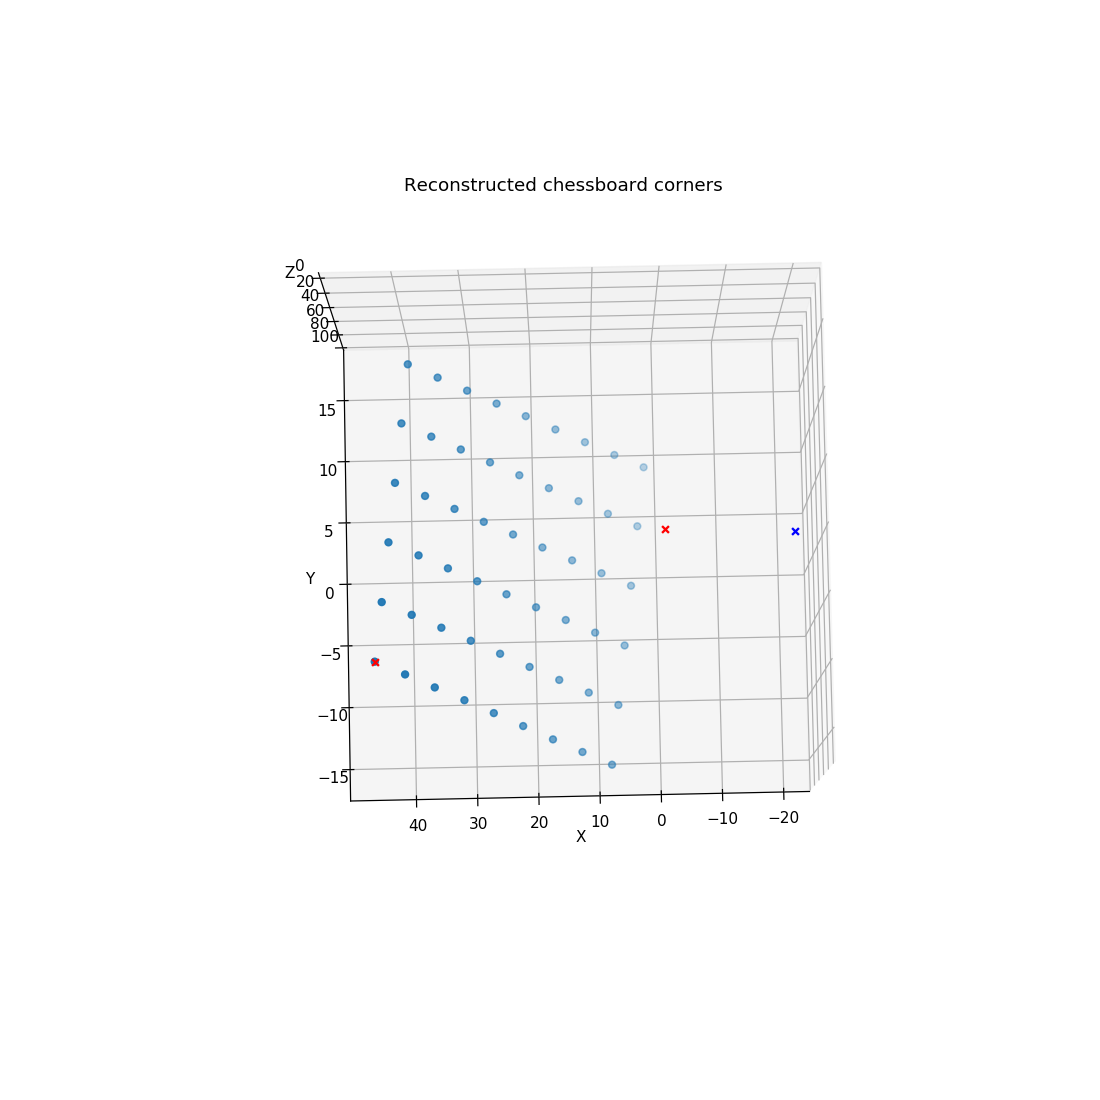

In [17]:
from mpl_toolkits.mplot3d import Axes3D

Xs = res3D[0]
Ys = res3D[1]
Zs = res3D[2]

#Ys = res3D[0]
#Zs = res3D[1]
#Xs = res3D[2]

%matplotlib notebook
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xs, Ys, Zs)

idx = 0
ax.scatter(Xs[idx], Ys[idx], Zs[idx], c='red', marker='x')
ax.scatter(loc1[0], loc1[1], loc1[2],c='red', marker='x')
ax.scatter(loc2[0], loc2[1], loc2[2],c='blue', marker='x')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Reconstructed chessboard corners')
plt.show()